https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/<br>
https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7<br>
https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html<br>
https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.predict.html#statsmodels.tsa.arima.model.ARIMAResults.predict<br>
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/


#Modelo 1: Pronóstico con ARIMA
[Serie de tiempo ARIMA](https://relopezbriega.github.io/blog/2016/09/26/series-de-tiempo-con-python/)


In [ ]:
!pip install holidays
!pip install holidays-co
!pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np
import holidays_co as hd
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('medellin.csv',sep=';')#,parse_dates=['Fecha'],index_col=['Fecha'])
df=df.dropna()
#datetime_series = pd.to_datetime(df['Fecha'])
#datetime_index = pd.DatetimeIndex(datetime_series.values)
#df=df.set_index(datetime_index)
#df.drop('Fecha',axis=1,inplace=True)
df

,fecha,servicios
0,1/04/2020,906
1,2/04/2020,1013
2,3/04/2020,1063
3,4/04/2020,953
4,5/04/2020,975
...,...,...
388,24/04/2021,1241
389,25/04/2021,1253
390,26/04/2021,1294
391,27/04/2021,1189


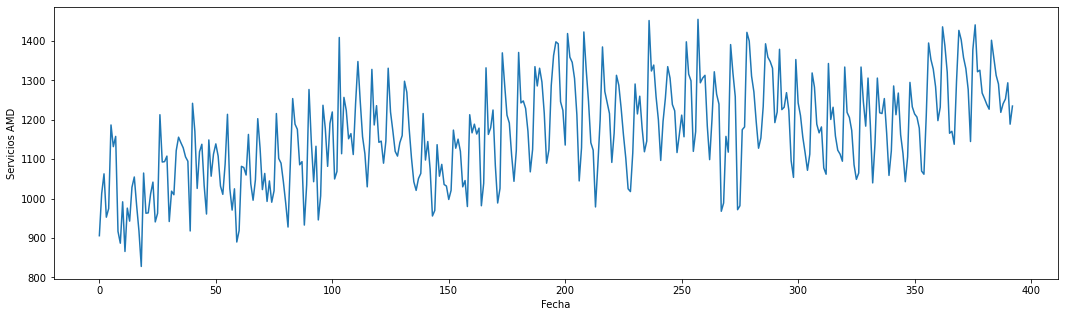

In [3]:
plt.figure(figsize=(18, 5))
plt.xlabel('Fecha')
plt.ylabel('Servicios AMD')
plt.plot(df['servicios'])

In [ ]:
plt.figure(figsize=(18, 5))
plt.plot(df['Servicios AMD'])

Rodando Estadísticas : TRAMA La desviación estándar media rodando y rodando. La serie de tiempo es estacionaria si permanecen constantes con el tiempo (a simple vista, observe si las líneas son rectas y paralelas al eje x).<br>
Prueba de Dickey-Fuller aumentada : la serie de tiempo se considera estacionaria si el valor p es bajo (de acuerdo con la hipótesis nula) y los valores críticos a intervalos de confianza del 1%, 5%, 10% están lo más cerca posible de las estadísticas de ADF

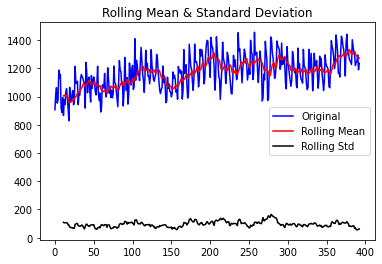

ADF Statistic: -2.6899071663915435
p-value: 0.0758011130087048
Critical Values:
	1%: -3.4477686860685
	5%: -2.869216670067509
	10%: -2.570859500573892


In [4]:

def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
        
get_stationarity(df['servicios'])

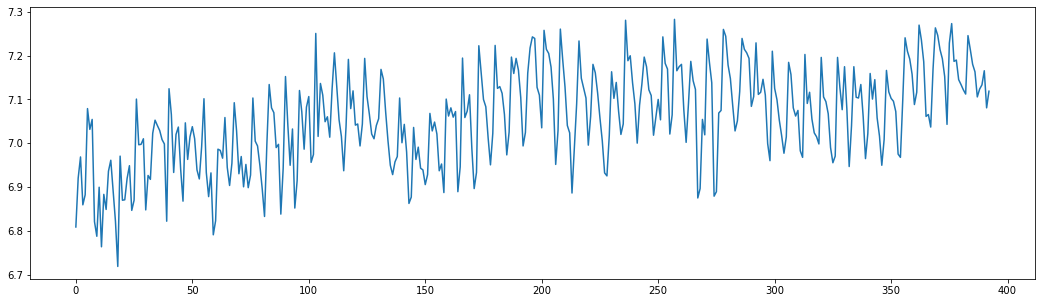

In [5]:
df_log = np.log(df['servicios']) #la aplicación del logaritmo reduce la velocidad a la que aumenta la media móvil
plt.figure(figsize=(18,5))
plt.plot(df_log)

tranformaciones para hacer que una serie de tiempo sea estacionaria

In [ ]:
#Resta de la media movil
rolling_mean = df_log.rolling (window = 12) .mean () 
df_log_minus_mean = df_log - rolling_mean 
df_log_minus_mean.dropna (inplace = True)
get_stationarity (df_log_minus_mean)

In [ ]:
#Desintegración exponencial
rolling_mean_exp_decay = df_log.ewm (halflife = 12, min_periods = 0, adjust = True) .mean () 
df_log_exp_decay = df_log - rolling_mean_exp_decay 
df_log_exp_decay.dropna (inplace = True)
get_stationarity (df_log_exp_decay)

In [ ]:
#Time Shifting
df_log_shift = df_log - df_log.shift () 
df_log_shift.dropna (inplace = True)
get_stationarity (df_log_shift)

Normalmente se utilizan tres números enteros (p, d, q) para parametrizar los modelos ARIMA.<br>
p: número de términos autorregresivos (orden AR)<br>
d: número de diferencias no estacionales (orden de diferenciación)<br>
q: número de términos de media móvil (orden MA)<br>

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1296x360 with 0 Axes>

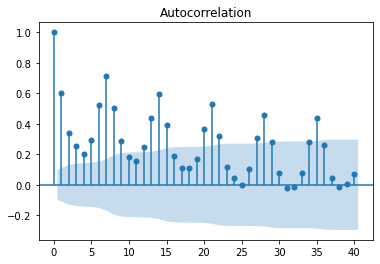

In [6]:
plt.figure(figsize=(18,5))
sm.graphics.tsa.plot_acf(df_log, lags=40)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1296x360 with 0 Axes>

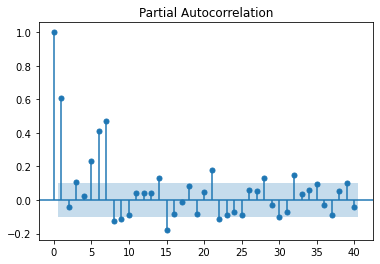

In [7]:
plt.figure(figsize=(18,5))
statsmodels.graphics.tsaplots.plot_pacf(df_log, lags=40)
plt.show

In [ ]:
#descomposition = seasonal_decompose(df_log)
model = ARIMA(df_log,order=(5,1,5))
results = model.fit(disp=-1)
plt.plot(df_log)
plt.plot(results.fittedvalues, color='red')

In [ ]:
plot = df["Servicios AMD"].plot(figsize=(18, 5))

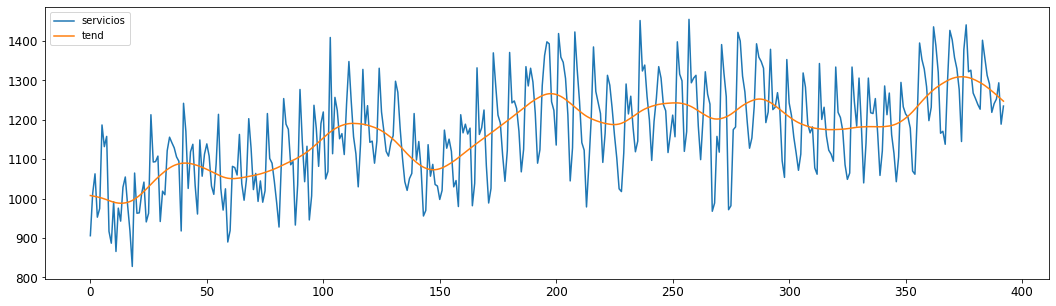

In [13]:
ciclo, tend = sm.tsa.filters.hpfilter(df["servicios"])
df['tend'] = tend
df[["servicios","tend"]].plot(figsize=(18, 5),fontsize=12)
legend = plt.legend()
legend.prop.set_size(14);

In [ ]:
modelo = sm.tsa.ARIMA(df["servicios"], order=(1, 0, 1))  
resultados = modelo.fit(disp=-1)
residuals = pd.DataFrame(resultados.resid)
residuals.plot() #Errores residuales, puede haber información de tendencia que el modelo aun no captura
plt.show()
residuals.plot(kind='kde') #densidad de valores de error residual, sugiere errores gaussianos
plt.show()
print(residuals.describe())
print(resultados.summary())
df['pronostico'] = resultados.fittedvalues  
df=df.dropna()
plot = df[['servicios', 'pronostico','tend']].plot(figsize=(18, 10),fontsize=12)
legend = plt.legend()
legend.prop.set_size(14);

In [53]:
size = int(len(df)*0.8)

In [54]:
df_train, df_test=df[0:size],df[size:len(df)]

In [55]:
history = [x for x in df_train['servicios']]
test = [x for x in df_test['servicios']]
predictions = list()
for t in range(len(df_test)):
    model = sm.tsa.ARIMA(history,order=(5,1,5))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat=output[0]
    obs = test[t]
    predictions.append(yhat)
    print("Predicción=%f, Esperado=%f"%(yhat,obs))

C:\Users\Christian\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Predicción=1289.266912, Esperado=1201.000000


C:\Users\Christian\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Predicción=1289.266912, Esperado=1232.000000


C:\Users\Christian\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Predicción=1289.266912, Esperado=1159.000000


C:\Users\Christian\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Predicción=1289.266912, Esperado=1123.000000


C:\Users\Christian\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Predicción=1289.266912, Esperado=1113.000000


C:\Users\Christian\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Predicción=1289.266912, Esperado=1095.000000


C:\Users\Christian\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Predicción=1289.266912, Esperado=1334.000000


C:\Users\Christian\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Predicción=1289.266912, Esperado=1219.000000


C:\Users\Christian\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Predicción=1289.266912, Esperado=1206.000000


C:\Users\Christian\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Predicción=1289.266912, Esperado=1173.000000


C:\Users\Christian\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Predicción=1289.266912, Esperado=1086.000000


C:\Users\Christian\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Predicción=1289.266912, Esperado=1049.000000


KeyboardInterrupt: 

C:\Users\Christian\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
<ipython-input-27-ffae16fd5c90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

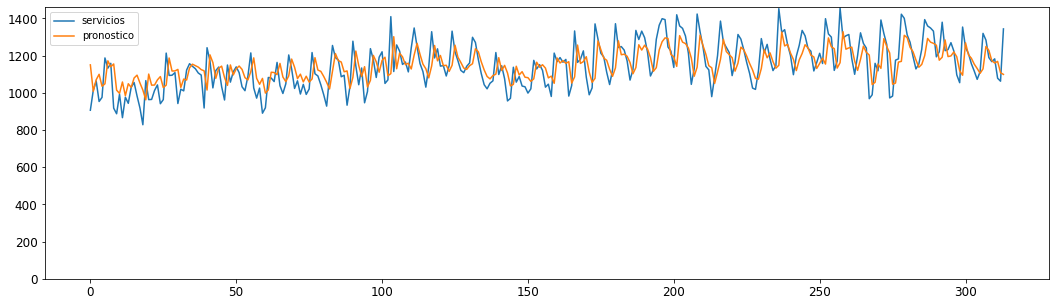

In [27]:
modelo = sm.tsa.ARIMA(df_train["servicios"], order=(1, 0, 0))  
resultados = modelo.fit(disp=-1)  
df_train['pronostico'] = resultados.fittedvalues  
df_train=df_train.dropna()
plot = df_train[['servicios', 'pronostico']].plot(figsize=(18, 5),fontsize=12) 
plt.ylim(0,max(df_train["pronostico"])*1.1)
legend.prop.set_size(14);

In [24]:
df_train

,fecha,servicios,tend
0,1/04/2020,906,1007.953022
1,2/04/2020,1013,1006.867398
2,3/04/2020,1063,1005.718054
3,4/04/2020,953,1004.445101
4,5/04/2020,975,1003.024453
...,...,...,...
309,4/02/2021,1167,1181.676143
310,5/02/2021,1182,1180.127775
311,6/02/2021,1078,1178.840441
312,7/02/2021,1062,1177.834009


In [25]:
df_test

,fecha,servicios,tend
314,9/02/2021,1201,1176.418835
315,10/02/2021,1232,1175.882699
316,11/02/2021,1159,1175.460436
317,12/02/2021,1123,1175.190641
318,13/02/2021,1113,1175.101619
...,...,...,...
388,24/04/2021,1241,1268.282665
389,25/04/2021,1253,1263.150466
390,26/04/2021,1294,1257.937978
391,27/04/2021,1189,1252.670203


In [31]:
from math import sqrt
rmse= sqrt(mean_squared_error(df_test['servicios'],predictions))
rmse

130.46682678791146

In [ ]:
df_test["|diferecia|"]=abs(df_test["Diferencia"])
df_test.sort_values(by="|diferecia|", ascending=True)

In [ ]:
df_test["Diferencia"]=df_test["Servicios AMD"]-df_test["pronostico"]
df_test["Diferencia"].mean()


In [ ]:
error_mse = mean_squared_error(
                y_true = df_test["Servicios AMD"],
                y_pred = df_test["pronostico"]
            )
print(f"Error de test (mse): {error_mse}")

In [ ]:
df1=df[df["year"]>=20]
modelo = sm.tsa.ARIMA(df1["Servicios AMD"].iloc[1:], order=(7, 0, 0))  
resultados = modelo.fit(disp=-1)  
df1['pronostico'] = resultados.fittedvalues  
df1=df1.dropna()
plot = df1[['Servicios AMD', 'pronostico','tend']].plot(figsize=(22, 8),fontsize=12) 
legend = plt.legend()
legend.prop.set_size(14);


In [ ]:
df1["Diferencia"]=df1["Servicios AMD"]-df1["pronostico"]
df1["Diferencia"]

In [ ]:
df1.sort_values(by='pronostico', ascending=False)

In [ ]:
error_mse = mean_squared_error(
                y_true = df1["Servicios AMD"],
                y_pred = df1["pronostico"]
            )
print(f"Error de test (mse): {error_mse}")

#Modelo 2: Pronostico de la serie sin transformar

[Ver notas de clase](https://jdvelasq.github.io/courses/notebooks/sklearn/mlp/1-04-pronostico-series-de-tiempo.html)


In [ ]:
data21=df[df["year"]==21]
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# crea el transformador
scaler = MinMaxScaler()

# escala la serie
data_scaled = scaler.fit_transform(np.array(data21["Servicios AMD"]).reshape(-1, 1))

# z es un array de listas como efecto
# del escalamiento
data_scaled = [u[0] for u in data_scaled]

plt.figure(figsize=(14, 5))
plt.plot(data_scaled, ".-k")
plt.grid()
plt.plot(
    [len(data_scaled) - 15, len(data_scaled) - 15],
    [min(data_scaled), max(data_scaled)],
    "--",
    linewidth=2,
);

In [ ]:
P =  15

X = []
for t in range(P - 1, len(data21) - 1):
    X.append([data_scaled[t - n] for n in range(P)])

observed_scaled = data_scaled[P:]

In [ ]:

from sklearn.neural_network import MLPRegressor

np.random.seed(123456)

H = 1  # Se escoge arbitrariamente

mlp = MLPRegressor(
    hidden_layer_sizes=(H,),
    activation="logistic",
    learning_rate="adaptive",
    momentum=0.0,
    learning_rate_init=0.09,
    max_iter=60000,
)

# Entrenamiento
mlp.fit(X[0:(len(data21)-15)], observed_scaled[0:(len(data21)-15)])  # 239 - 24 = 215

# Pronostico
y_scaled_m1 = mlp.predict(X)

plt.figure(figsize=(14, 5))
plt.plot(data_scaled, ".-k")
plt.grid()

# No hay pronóstico para los primeros 13 valores
# de la serie
#
plt.plot([None] * P + y_scaled_m1.tolist(), "-r")

# linea vertical para dividir el entrenamiento
# del pronóstico. Se ubica en el ultimo dato
# usando para entrenamiento
#
plt.plot(
    [len(data_scaled) - 15, len(data_scaled) - 15],
    [min(data_scaled), max(data_scaled)],
    "--",
    linewidth=2,
);

In [ ]:
y_m1 = scaler.inverse_transform([[u] for u in y_scaled_m1])
y_m1 = [u[0] for u in y_m1]

plt.figure(figsize=(14, 5))
plt.plot(data21["Servicios AMD"], ".-k")
plt.grid()
plt.plot([None] * P + y_m1, "-r")
plt.plot([len(data21) - 24, len(data21) - 24], [min(data21), max(data21)], "--", linewidth=2);

#Modelo 3: Pronóstico de la serie transformada

[Ver notas de clase](https://jdvelasq.github.io/courses/notebooks/sklearn/mlp/1-04-pronostico-series-de-tiempo.html)


In [ ]:
# Se remueve la tendencia
data=data21["Servicios AMD"].to_list()
data_d1 = [data[t] - data[t - 1] for t in range(1, len(data))]

# En la gráfica queda la componente cíclica
plt.figure(figsize=(14, 5))
plt.plot(data_d1, ".-k")
plt.grid()
plt.plot(
    [len(data_d1) - 24, len(data_d1) - 24],
    [min(data_d1), max(data_d1)],
    "--",
    linewidth=2,
);

In [ ]:
data_d1d12 = [data_d1[t] - data_d1[t - 12] for t in range(12, len(data_d1))]

plt.figure(figsize=(14, 5))
plt.plot(data_d1d12, ".-k")
plt.grid()
plt.plot(
    [len(data_d1d12) - 15, len(data_d1d12) - 15],
    [min(data_d1d12), max(data_d1d12)],
    "--",
    linewidth=2,
);

In [ ]:
#
# Se escalan los valores como en el caso anaterior
#
scaler = MinMaxScaler()
data_d1d12_scaled = scaler.fit_transform(np.array(data_d1d12).reshape(-1, 1))
data_d1d12_scaled = [u[0] for u in data_d1d12_scaled]

#
# Se verifica visualmente el escalamiento
#
plt.figure(figsize=(14, 5))
plt.plot(data_d1d12_scaled, ".-k")
plt.grid()
plt.plot(
    [len(data_d1d12_scaled) - 24, len(data_d1d12_scaled) - 24],
    [min(data_d1d12_scaled), max(data_d1d12_scaled)],
    "--",
    linewidth=2,
);

In [ ]:
P = 13

X = []
for t in range(P - 1, len(data_d1d12_scaled) - 1):
    X.append([data_d1d12_scaled[t - n] for n in range(P)])

d = data_d1d12_scaled[P:]
len(X)

In [ ]:
H = 4 # Se escoge arbitrariamente

np.random.seed(123456)

mlp = MLPRegressor(
    hidden_layer_sizes=(H, ),
    activation = 'logistic',
    learning_rate = 'adaptive',
    momentum = 0.0,
    learning_rate_init = 0.002,
    max_iter = 100000)

# Entrenamiento
mlp.fit(
    X[0:len(X)-15],  # 226 - 24 = 202
    data_d1d12_scaled[0:len(X)-15]
)

# Pronostico
y_d1d12_scaled_m2 = mlp.predict(X)


plt.figure(figsize=(14,5))
plt.plot(data_d1d12_scaled, '.-k')
plt.grid()

# No hay pronóstico para los primeros 13 valores
# de la serie
plt.plot([None] * P + y_d1d12_scaled_m2.tolist(), '-r');

# linea vertical para dividir el entrenamiento
# del pronóstico
plt.plot([len(data_d1d12_scaled)-24, len(data_d1d12_scaled)-24], [min(data_d1d12_scaled), max(data_d1d12_scaled)], '--', linewidth=2);

In [ ]:
y_d1d12_scaled_m2 = data_d1d12_scaled[0:P] + y_d1d12_scaled_m2.tolist()

y_d1d12_m2 = scaler.inverse_transform([[u] for u in y_d1d12_scaled_m2])
y_d1d12_m2 = [u[0] for u in y_d1d12_m2.tolist()]

y_d1_m2 = [y_d1d12_m2[t] + data_d1[t] for t in range(len(y_d1d12_m2))]
y_d1_m2 = data_d1[0:12] + y_d1_m2

y_m2 = [y_d1_m2[t] + data[t] for t in range(len(y_d1_m2))]

y_m2 = [data[0]] + y_m2

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(data, ".-k")
plt.grid()

plt.plot(y_m2, "-r")

# linea vertical para dividir el entrenamiento
# del pronóstico. Se ubica en el ultimo dato
# usando para entrenamiento
plt.plot([len(data) - 15, len(data) - 15], [min(data), max(data)], "--", linewidth=2);

#Modelo 4: Pronóstico con ADALINE
[Ver notas de clase](https://jdvelasq.github.io/courses/notebooks/sklearn/adaline/1-02-pronostico-airline.html)

In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
plt.figure(figsize=(11,3))
plt.plot(data, '-k');

In [ ]:
from statsmodels.tsa.stattools import acf

acf_data = acf(data[0:80], fft=False)
plt.stem(range(len(acf_data)), acf_data, use_line_collection=True)
plt.ylim(-1, 1);
plt.grid();

In [ ]:
import numpy as np

u = np.array(data[1:len(data)]) - np.array(data[0:len(data) - 1])

In [ ]:
plt.figure(figsize=(11,3))
plt.plot(u, '-k');

In [ ]:
acf_data = acf(u[0:79], fft=False)
plt.stem(range(len(acf_data)), acf_data, use_line_collection=True)
plt.ylim(-1, 1)
plt.grid();

In [ ]:
import numpy as np

u = np.array(data[1:len(data)]) - np.array(data[0:len(data) - 1])

In [ ]:
from statsmodels.tsa.stattools import pacf

pacf_data = pacf(u[0:79])
plt.stem(range(len(pacf_data)), pacf_data, use_line_collection=True)
plt.ylim(-1, 1);
plt.grid();

In [ ]:
class AdalineTS:

    def __init__(self,
                 P=None,               # número de retardos a usar
                 learning_rate=0.001): # tasa de aprendizaje

        self.P = P
        self.learning_rate = learning_rate
        self.X = []
        self.coef_ = [0.] * P
        self.intercept_ = 0.

    def predict(self):
        if len(self.X) < self.P:
            return None
        X = np.array(self.X)
        u = np.dot(X, self.coef_) + self.intercept_
        return u

    def fit(self, d):
        y = self.predict()
        if y is not None:
            e = d - y
            self.coef_ += 2 * self.learning_rate * e * np.array(self.X)
            self.intercept_ += 2 * self.learning_rate * e
        self.X.append(d)
        if len(self.X) > self.P:
            self.X.pop(0)

In [ ]:
optimal_learning_rate = None
optimal_sse = None

P = 3

for learning_rate in np.linspace(start=0.000001, stop=0.01, num=100):

    adaline = AdalineTS(
        P=P,
        learning_rate=learning_rate)

    forecasts = []

    for z in u[0:79]:
        forecasts.append(adaline.predict())
        adaline.fit(z)

    sse = sum([(a-b)**2 for a,b in zip(u[P:79], forecasts[P:])])

    if optimal_sse is None or sse < optimal_sse:
        optimal_sse = sse
        optimal_learning_rate = learning_rate
        print('sse = {}  mu = {}'.format(sse, learning_rate))

In [ ]:
adaline = AdalineTS(
    P=P,
    learning_rate=optimal_learning_rate)

forecasts = []

for z in u:
    forecasts.append(adaline.predict())
    adaline.fit(z)

In [ ]:
s = [m + n for m,n in zip(d[P:len(d)-1], forecasts[P:])]
s = d[0:P+1] + s
len(s)

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(d,'.-k', lw=2, ms=15)
plt.plot(s, '.-r', lw=2, ms=15, alpha=0.5)
#plt.vlines([80], ls='--', color='gray')
plt.show()

In [ ]:
mse_fit = sum([(a - b)**2 for a,b in zip(d[4:80], s[4:80])]) / len(s[4:80])
mse_fore = sum([(a - b)**2 for a,b in zip(d[80:], s[80:])]) / len(s[80:])
print(mse_fit, mse_fore)